<center><h3 style='color:red'>Keras | CNN Dog or Cat Classification</h3></center>

### Table:
* **Introduction**
* **Configuration**
* **Read & Preprocessing the Data**
* **CNN Network**
    * **Training**
* **Evaluation**
* **Results**
* **Testing Visualization**
* **Other Solutions (TL)**

<hr>

**NEW IN VERSION 7:**
   * Use ImageDataGenerator to read and preprocess the images directly.
   * Different custom CNN network.
   * Add EarlyStoping callback.
   * Add comments and table.
    

## Introduction

**objective: Distinguish images of dogs from cats** using custom CNN network using keras.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

from glob import glob

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop

import cv2

Using TensorFlow backend.


In [2]:
import os
print(os.listdir('../input/cat-and-dog/test_set/test_set'))

['dogs', 'cats']


## Configuration

In [3]:
category = ["cats", "dogs"]

EPOCHS                  = 40
IMGSIZE                 = 128
CHANNELS                = 3 # grayscale=1 color=3
BATCH_SIZE              = 32
STOPPING_PATIENCE       = 8
VERBOSE                 = 1
MODEL_NAME              = 'cnn_50epochs_imgsize128.h5'
OPTIMIZER               = 'adam'
TRAINING_DIR            = '../input/cat-and-dog/training_set/training_set'
TEST_DIR                = '../input/cat-and-dog/test_set/test_set'

## Read & Preprocessing Data

In [4]:
generator = ImageDataGenerator(rescale=1./255, 
                               shear_range=0.15, 
                               zoom_range=0.2, 
                               horizontal_flip=True
                              ) 

train_data = generator.flow_from_directory( directory=TRAINING_DIR, 
                                            target_size=(IMGSIZE, IMGSIZE),
                                            color_mode='rgb',#grayscale
                                            classes=category, 
                                            batch_size=BATCH_SIZE, 
                                            )


test_data = generator.flow_from_directory( directory=TEST_DIR, 
                                           target_size=(IMGSIZE, IMGSIZE), 
                                           color_mode='rgb',
                                           classes=category, 
                                           batch_size=BATCH_SIZE,
                                           shuffle=False
                                           )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## CNN Network

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMGSIZE, IMGSIZE, CHANNELS)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

### Training

In [6]:
es = EarlyStopping(patience=STOPPING_PATIENCE, 
                   monitor='val_accuracy', 
                   mode='max', 
                   verbose=1, 
                   restore_best_weights=True)

history = model.fit_generator(train_data, 
                              epochs=EPOCHS, 
                              validation_data=test_data,
                              shuffle=True,
                              callbacks=[es]
                             )

Epoch 1/40
251/251 [==============================] - 83s 330ms/step - loss: 1.1558 - accuracy: 0.5958 - val_loss: 2.7017 - val_accuracy: 0.4938
Epoch 2/40
251/251 [==============================] - 59s 235ms/step - loss: 1.0100 - accuracy: 0.6406 - val_loss: 1.0552 - val_accuracy: 0.5803
Epoch 3/40
251/251 [==============================] - 59s 235ms/step - loss: 0.9700 - accuracy: 0.6593 - val_loss: 0.3621 - val_accuracy: 0.5650
Epoch 4/40
251/251 [==============================] - 59s 234ms/step - loss: 0.8805 - accuracy: 0.6681 - val_loss: 3.6711 - val_accuracy: 0.5087
Epoch 5/40
251/251 [==============================] - 59s 237ms/step - loss: 0.7974 - accuracy: 0.7001 - val_loss: 2.8108 - val_accuracy: 0.6174
Epoch 6/40
251/251 [==============================] - 59s 235ms/step - loss: 0.7106 - accuracy: 0.7255 - val_loss: 1.4557 - val_accuracy: 0.7148
Epoch 7/40
251/251 [==============================] - 59s 235ms/step - loss: 0.6819 - accuracy: 0.7405 - val_loss: 0.5136 - val_ac

## Evaluation

In [7]:
train_acc = model.evaluate(train_data)
test_acc = model.evaluate(test_data)

64/64 [==============================] - 12s 191ms/step


## Results

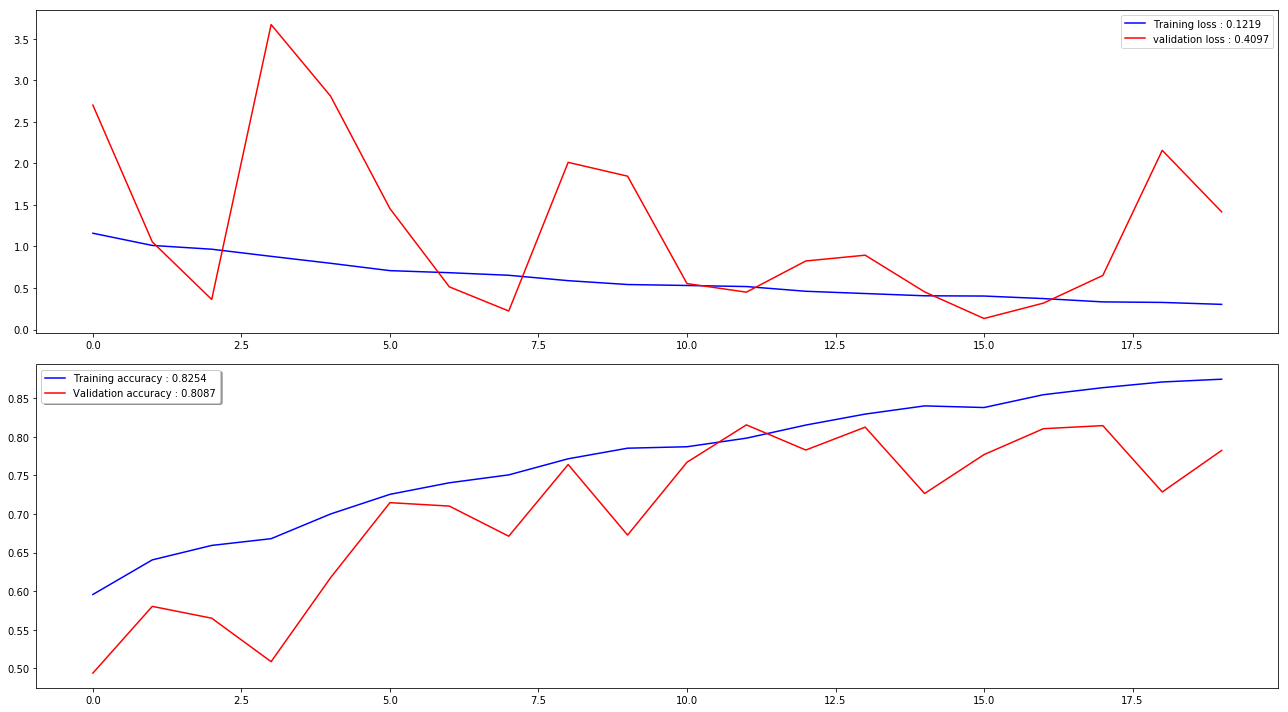

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))
ax1.plot(history.history['loss'], color='b', label="Training loss : {:0.4f}".format(train_acc[0]))
ax1.plot(history.history['val_loss'], color='r', label="validation loss : {:0.4f}".format(test_acc[0]))
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy : {0:.4f}".format(train_acc[1]))
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy : {0:.4f}".format(test_acc[1]))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## Testing Visualization

In [9]:
test_paths = np.array(glob(TEST_DIR +'/*/*.jpg'))# '../input/mes-chats'

np.random.seed(42)
ids = np.random.choice(np.arange(len(test_paths)), size=32)

samples = test_paths[ids]

In [10]:
im_test = []
c = 0
for img in samples:
    c = c + 1
    img_path =img
    img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_arr = cv2.resize(img_arr, (IMGSIZE, IMGSIZE))
    img_arr = img_arr / 255.0
    im_test.append(img_arr)

    
im_test = np.array(im_test).reshape(-1, IMGSIZE, IMGSIZE, 3)
im_pred = model.predict(im_test)

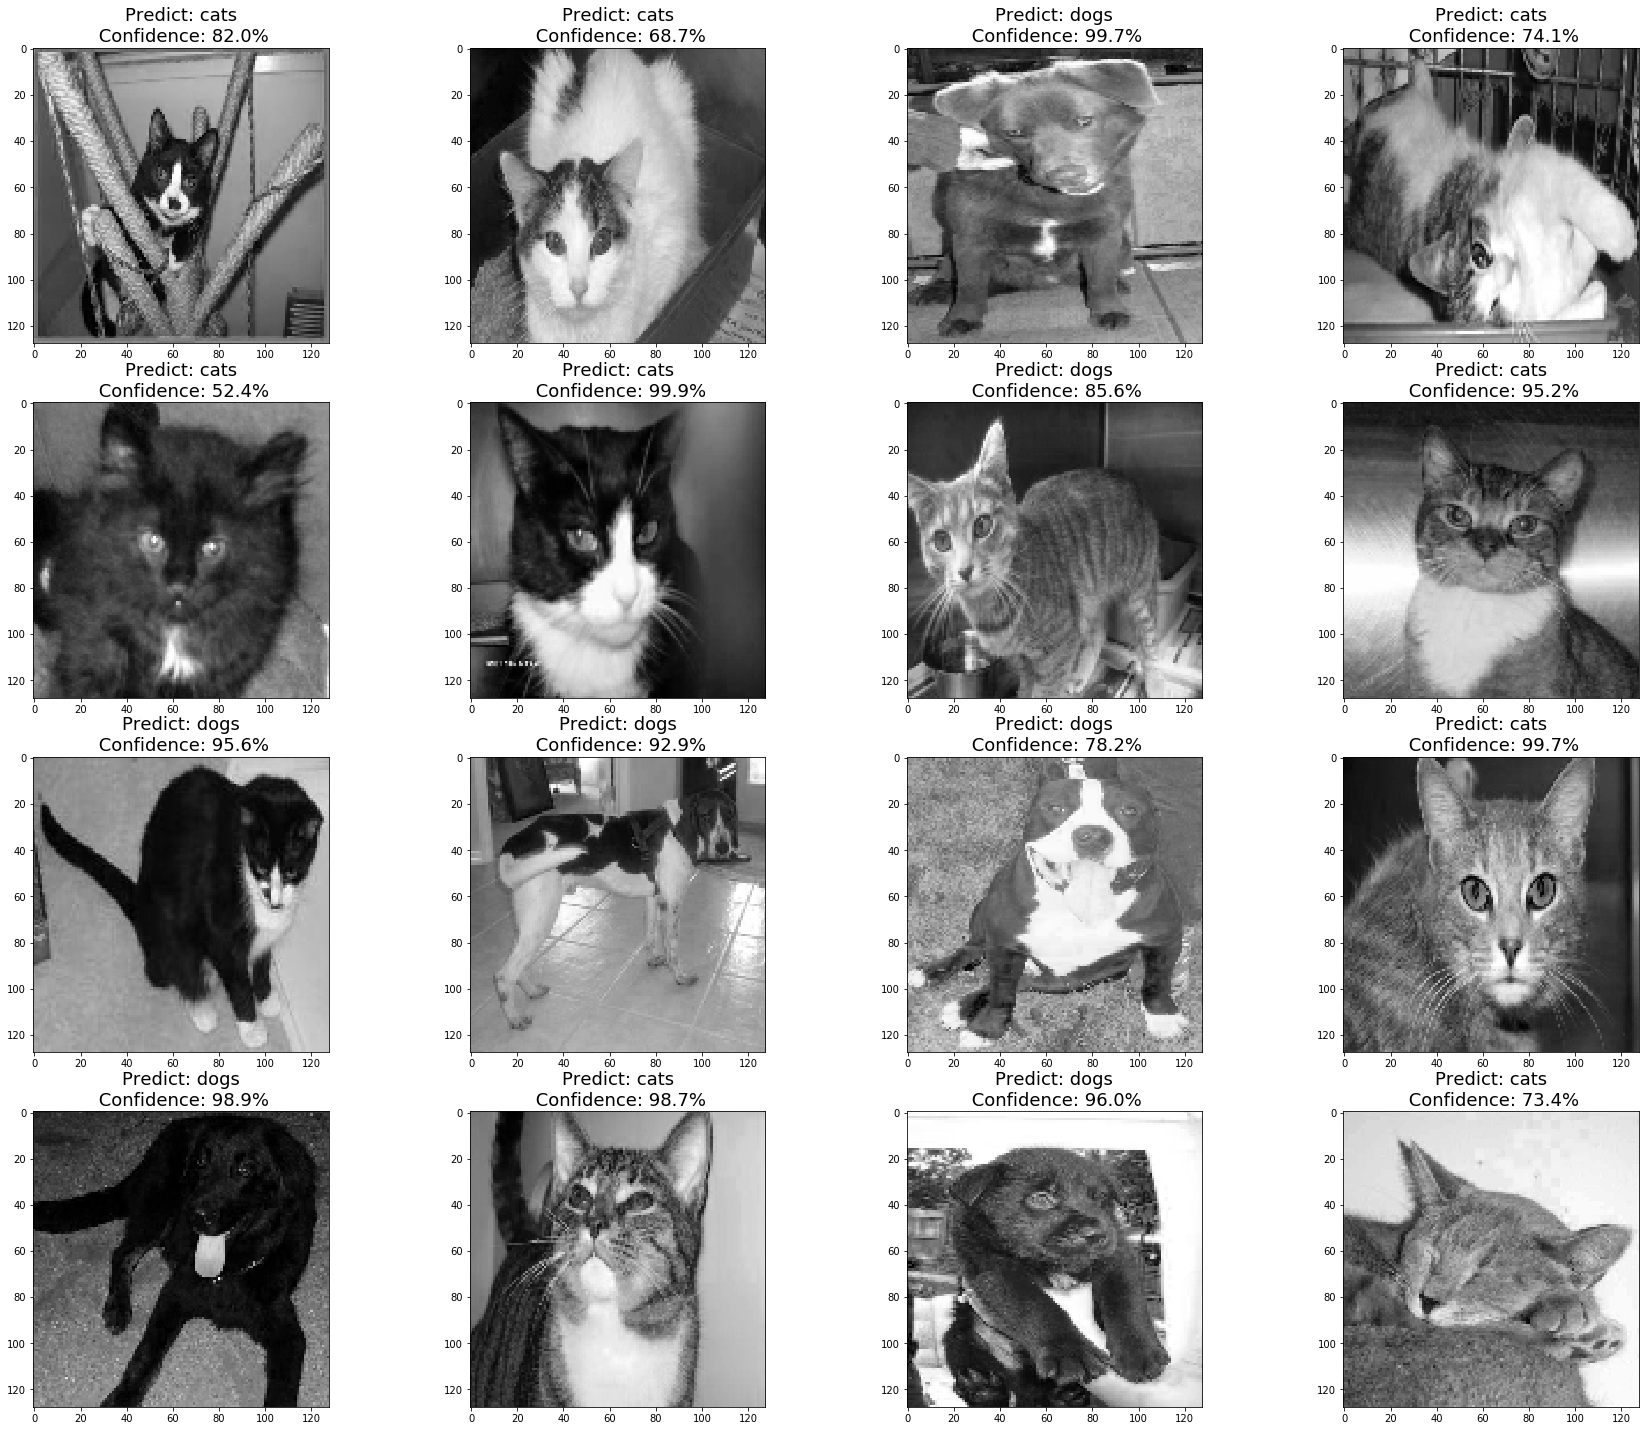

In [11]:
fig , ax = plt.subplots(4, 4, figsize=(30, 25))

for i, axis in enumerate(ax.flat):
    axis.imshow(im_test[i][:, :, 0], cmap='gray')
    pred_class = im_pred[i].argmax()
    pred_prob = im_pred[i].max() * 100

    axis.set_title(f'Predict: {category[pred_class]}\n Confidence: {pred_prob:.1f}%', fontsize=18)

In [12]:
# save the model weights
model.save_weights(MODEL_NAME)

## Other Solution:

Rather than using your custom CNN network, you can use a pretrained model.
This method called **Transfer Learning**. 

check out how to implement it: **[Transfer Learning (CATs vs DOGs)](https://www.kaggle.com/code/elcaiseri/transfer-learning-cat-vs-dog)**

### If you like, <span style='color:red'>UPVOTE</span> it. feel free to ask me anything in the comment section.